# Animation exercises (Informatics II)

author: F. Feenstra

This week you will work on the assignment to animate an object following a sinuswave path. In this tutorial we will explain how to calculate the sinuswave path and we will use turtle to animate the sinuswave. Make sure you write your own script according the template. If you want to challenge yourself try to seperate the sinus calculations from the main module and import the sinuspath calculations as a seperate module.



---


## I. Calculating sinuswave path

In this assignment we will compute the sinuswave. The sinuswave is computed by 

$y(t) = A\sin(2 \pi f t + \varphi)$

where $A$ is the Amplitude, $f$ is the frequency and $\varphi$ is the phase. We can translate this formula in python using the following code: 



In [ ]:
def comp_y(t):
    """compute the y value of the sin wave at the for a specific sample"""
    y_t = amplitude * np.sin(2*np.pi * frequency * (t/sample_rate) + phase) 
    return y_t

This function computes the y-value for a particular x-value (time t). If we want to compute a sinus wave for time 0 till time 99 we need to compute 100 y values along with the 100 x values (t = 0..99). The following code demonstrates this. 

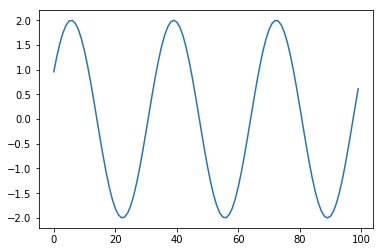

0

In [2]:
#IMPORTS
import matplotlib.pyplot as plt 
import numpy as np 
import sys

#GLOBALS
SAMPLE_RATE = 100 
FREQUENCY = 3
AMPLITUDE = 2
PHASE = 0.5

#DEFINITIONS
def comp_y(t):
    """compute the y value of the sin wave at the for a specific sample"""
    y_t = AMPLITUDE * np.sin(2*np.pi * FREQUENCY * (t/SAMPLE_RATE) + PHASE) 
    return y_t

def comp_amplitude(x):
    """compute the y value of the sin wave at the for each sample"""
    y = []
    for t in x:
        y.append(comp_y(t))
    return y

def main():
    # eliminate this line in IDLE or pycharm 
    % matplotlib inline 
 
    x = np.arange(SAMPLE_RATE) # the points on the x axis for plotting
    y = comp_amplitude(x) # the points on the y axis for plotting
    plt.plot(x,y)
    plt.show()
    return 0

main()


The demonstrated code imports the module matplotlib and numpy. The module matplotlib is used to plot the values and the numpy module is used for the methods .arange and .pi

To understand more about the .arange method we can print the documentationhelp(

    print(getattr(np, "arange").__doc__)
  
or launch the help function

    help(np.arange)
    

The value np.pi is as follow:

In [ ]:
print(np.pi)

## Assignment I: play with sinus

Print the documentation of the arange method. What does the method do?

Write a script that plots a sinus wave. Adjust the values of sample_rate, frequency, amplitude and phase. What is the effect? Make sure that you write the script using the template. Use docstrings for every function. Run the script in IDLE or pycharm. 

If you want to challenge yourself you can make the script with an own made
module that you import.

---

## II. Sinus the turtle

Now we found out how to code the path of a sinuswave we can let our turtle walk a sinuswave path. We have to think about several things. If we want to use the full screen we have to depend our sample_rate on the screen size. 


In [3]:
#IMPORTS
import turtle

MARGE = 10
SCREEN = turtle.Screen()
SAMPLE_RATE = int(SCREEN.window_width()/2 -MARGE) - int(MARGE - SCREEN.window_width()/2)

Further more I have to make sure that my turtle only shows up when I am in the right position

In [ ]:
start = int(MARGE - SCREEN.window_width()/2)
dude = turtle.Turtle(shape="turtle", visible = False)
dude.penup()
i = start
for j in range(0, SAMPLE_RATE):
    dude.goto(i,y[j])
    if i == start:
        dude.pendown()
        dude.showturtle()
    i +=1

With the method setheading() I can set the direction of the turtle's head

In [ ]:
dude.setheading(np.arctan2(y[j]-pos[1], i-pos[0]) * 180 / np.pi) 

The final code for the turtle sinusmove is as follow:

In [ ]:
#!/usr/bin/env python3

"""
program shows turtle following sinuswave
"""

__author__ = "F.Feenstra"

## CODE

#IMPORTS
import numpy as np
import sys
import turtle

#CONSTANTS
MARGE = 10
SCREEN = turtle.Screen()
SAMPLE_RATE = int(SCREEN.window_width()/2 -MARGE) - int(MARGE - SCREEN.window_width()/2)
AMPLITUDE = SCREEN.window_height()/4
PHASE = 0
FREQUENCY = 2

#FUNCTIONS

def comp_y(t):
    """compute the y value of the sin wave at the for a specific sample"""
    y_t = AMPLITUDE * np.sin(2 * np.pi * FREQUENCY * (t/SAMPLE_RATE) + PHASE)
    return y_t


def comp_amplitude(x):
    """compute the y value of the sin wave at the for each sample"""
    y = []
    for t in x:
        y.append(comp_y(t))
    return y


def turtle_wave(start, y):
    """Draw a turtle and move it over the sinewave, starting at _start_"""
    dude = turtle.Turtle(shape="turtle", visible = False)
    dude.penup()
    i = start
    for j in range(0, SAMPLE_RATE):
        pos = dude.pos()
        dude.setheading(np.arctan2(y[j]-pos[1], i-pos[0]) * 180 / np.pi) 
        dude.goto(i, y[j])
        if i == start:
            dude.pendown()
            dude.showturtle()
        i +=1
    return


def main():
    """Main function to calculate sine wave and draw turtle"""
    start = int(MARGE - SCREEN.window_width()/2)
    end = int(SCREEN.window_width()/2 - MARGE)
    x = np.arange(start, end) # the points on the x axis for plotting
    y = comp_amplitude(x) # the points on the y axis for plotting
    turtle_wave(start, y)
    return 0


if __name__ == '__main__':
    exitcode = main()
    sys.exit(exitcode)

## Assignment II: Go Left

The code above makes the turtle to move from left to the right. Change the code to make the turtle move from left to right and **then from right to left**. Basically it should move backwards after it moved forward. Make sure that the turtles head is in the right direction as well. See also the <a href = "https://docs.python.org/3/library/turtle.html">python docs for turtle </a> 
